<a href="https://colab.research.google.com/github/eslambasem99/MNISTDigitRecognizer/blob/main/MNISTDigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/MyDrive/Coding/Eslam/MNIST Digit Recognizer"

/content/gdrive/MyDrive/Coding/Eslam/MNIST Digit Recognizer


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
data = pd.read_csv("data/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(data.shape)


(42000, 785)


In [7]:
X=data.drop("label",axis=1).values
y=data["label"].values

In [8]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


<Axes: xlabel='label', ylabel='count'>

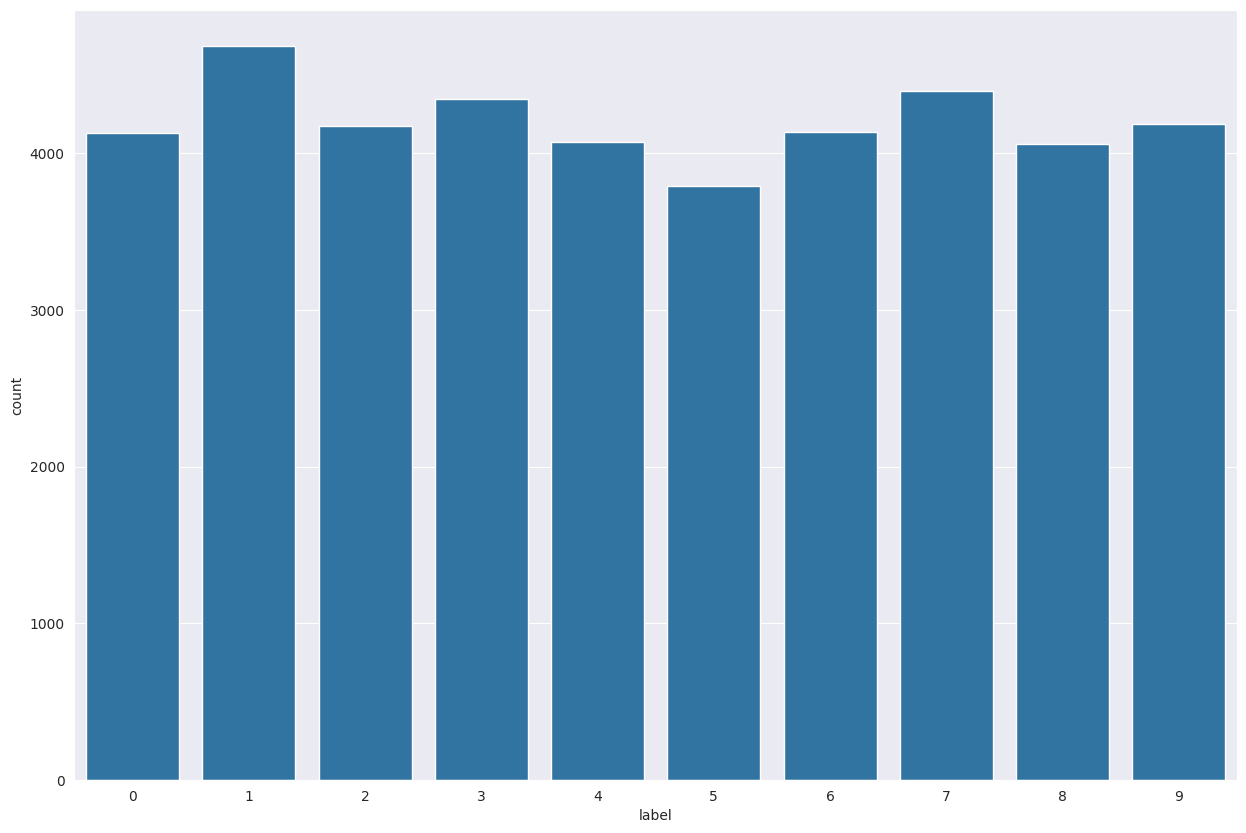

In [9]:

plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.countplot(x="label",data=data)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39900, 784)
(2100, 784)
(39900,)
(2100,)


In [12]:
error_rate=list()
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i=knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error Rate')

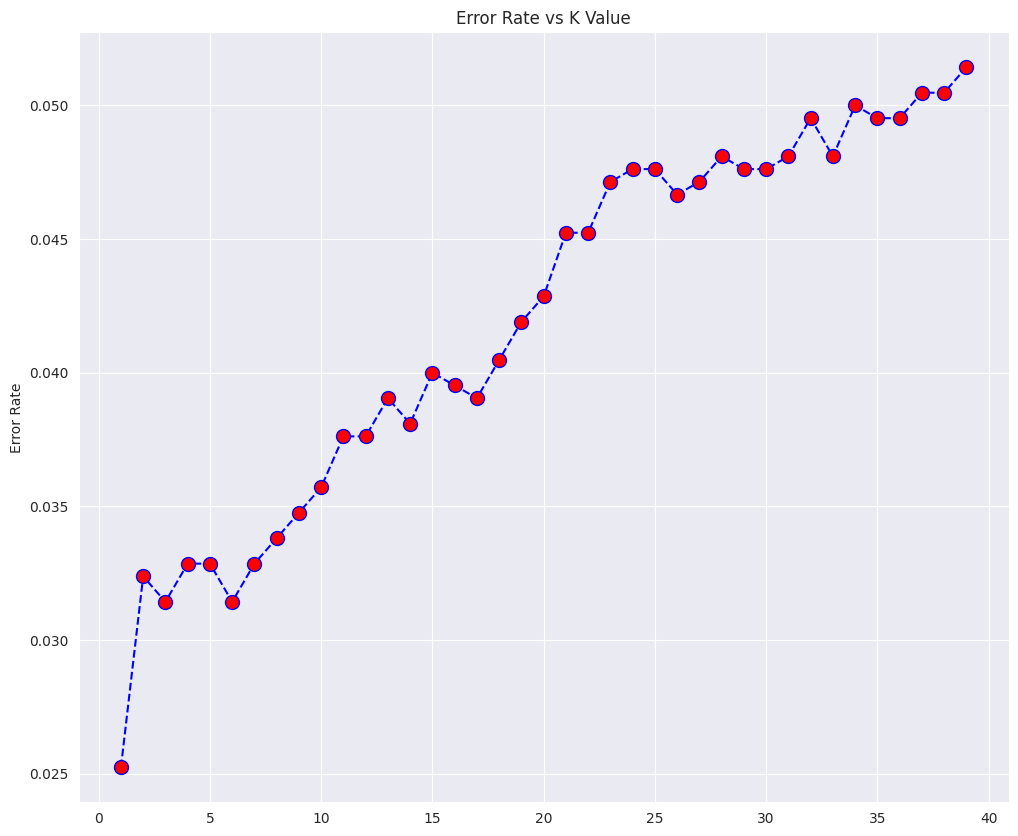

In [15]:
plt.figure(figsize=(12,10))
plt.plot(range(1,40),error_rate, color="blue", linestyle="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel="K Value"
plt.ylabel("Error Rate")

In [16]:
knn=KNeighborsClassifier(n_neighbors=1)


In [17]:
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,knn_predictions))

[[215   0   0   0   0   0   1   0   0   0]
 [  0 234   0   0   0   0   0   0   0   0]
 [  1   4 211   0   2   0   1   2   0   1]
 [  0   1   1 252   0   2   0   2   1   1]
 [  0   1   0   0 191   0   0   0   0   4]
 [  0   0   0   1   0 155   1   0   2   1]
 [  2   0   0   0   0   0 197   0   0   0]
 [  0   4   0   0   0   0   0 223   0   3]
 [  0   2   2   1   0   4   0   0 181   1]
 [  1   0   0   0   1   0   0   2   0 188]]


In [19]:
print(classification_report(y_test, knn_predictions))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       216
           1       0.95      1.00      0.97       234
           2       0.99      0.95      0.97       222
           3       0.99      0.97      0.98       260
           4       0.98      0.97      0.98       196
           5       0.96      0.97      0.97       160
           6       0.98      0.99      0.99       199
           7       0.97      0.97      0.97       230
           8       0.98      0.95      0.97       191
           9       0.94      0.98      0.96       192

    accuracy                           0.97      2100
   macro avg       0.97      0.97      0.97      2100
weighted avg       0.98      0.97      0.97      2100



In [20]:
print(accuracy_score(y_test, knn_predictions))


0.9747619047619047


In [21]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train,y_train)
random_predictions= random.predict(X_test)

In [22]:
print(classification_report(y_test, random_predictions))
print(confusion_matrix(y_test,random_predictions))
print(accuracy_score(y_test, random_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       216
           1       0.98      0.99      0.99       234
           2       0.96      0.96      0.96       222
           3       0.96      0.96      0.96       260
           4       0.95      0.97      0.96       196
           5       0.96      0.96      0.96       160
           6       0.98      0.98      0.98       199
           7       0.98      0.97      0.97       230
           8       0.95      0.93      0.94       191
           9       0.92      0.93      0.93       192

    accuracy                           0.96      2100
   macro avg       0.96      0.96      0.96      2100
weighted avg       0.96      0.96      0.96      2100

[[212   0   2   0   0   0   2   0   0   0]
 [  0 232   2   0   0   0   0   0   0   0]
 [  0   2 213   0   5   0   0   0   2   0]
 [  0   0   1 250   0   1   0   2   3   3]
 [  0   0   0   0 190   0   1   0   0   5]
 [  0   0   0   3   0 154 

In [25]:
bayes=GaussianNB()
bayes.fit(X_train, y_train)
bayes_predictions=bayes.predict(X_test)
print(classification_report(y_test, bayes_predictions))
print(confusion_matrix(y_test, bayes_predictions))
print(accuracy_score(y_test, bayes_predictions))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       216
           1       0.76      0.92      0.83       234
           2       0.93      0.24      0.39       222
           3       0.80      0.36      0.50       260
           4       0.78      0.15      0.25       196
           5       0.62      0.09      0.16       160
           6       0.58      0.96      0.72       199
           7       0.94      0.34      0.50       230
           8       0.29      0.64      0.39       191
           9       0.37      0.93      0.52       192

    accuracy                           0.56      2100
   macro avg       0.68      0.55      0.51      2100
weighted avg       0.70      0.56      0.52      2100

[[188   1   1   0   0   0  11   0  13   2]
 [  0 216   1   0   0   0   3   0   8   6]
 [ 22   6  54  17   1   2  69   0  49   2]
 [ 12  16   0  94   0   1  22   1  89  25]
 [  4   3   1   0  29   0  24   1  39  95]
 [ 18   7   0   2   1  15 

Convolutional Neural Networks:

In [27]:
X = X.reshape(-1,28,28,1)


In [33]:
y = to_categorical(y)

print(f"Label size {y.shape}")

Label size (42000, 10)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39900, 28, 28, 1)
(2100, 28, 28, 1)
(39900, 10)
(2100, 10)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,  ReduceLROnPlateau
cnn=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))
cnn.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
cnn.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
cnn.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(BatchNormalization())
cnn.add(Dense(512,activation="relu"))

cnn.add(Dense(10,activation="softmax"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [40]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)


train_generator = datagen.flow(X_train, y_train, batch_size=32)


In [42]:
history = cnn.fit(train_generator,
                  epochs = 1,

                )

1247/1247 ━━━━━━━━━━━━━━━━━━━━ 327s 262ms/step - accuracy: 0.9590 - loss: 0.1300


In [ ]:
y_pred = cnn.predict(X_test)
X_new = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_new[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [ ]:
predictions = cnn.predict(test, verbose=2)
predictions

In [ ]:
new_predictions =np.argmax(predictions, axis=1)
new_predictions